<a href="https://colab.research.google.com/github/a2r4vind/Logo-Generator/blob/main/logo_generator_app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Required Dependencies

In [1]:
!pip install numpy pillow matplotlib tensorflow opencv-python scikit-learn streamlit pandas scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


#AI Logo Generator Python Script

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import cv2
import os
import random
import colorsys
import string
from scipy.spatial import distance
import pickle
import io
import base64
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
class LogoGenerator:
    def __init__(self):
        # Initialize core components
        self.model = self._load_model()
        self.font_collection = self._initialize_fonts()
        self.color_schemes = self._initialize_color_schemes()
        self.icon_templates = self._initialize_icon_templates()
        self.competitor_embeddings = {}
        self.cultural_symbols_db = self._load_cultural_symbols_db()

    def _load_model(self):
        """Load or initialize the generative model for logo creation"""
        try:
            # For demonstration, we're using a simplified model
            # In production, this would load a pre-trained GAN or similar model
            model = keras.Sequential([
                keras.layers.Dense(256, activation='relu', input_shape=(100,)),
                keras.layers.BatchNormalization(),
                keras.layers.Dense(512, activation='relu'),
                keras.layers.BatchNormalization(),
                keras.layers.Dense(1024, activation='relu'),
                keras.layers.Dense(784, activation='tanh'),
                keras.layers.Reshape((28, 28, 1))
            ])
            return model
        except:
            print("Warning: Using simplified model. For production, train a specialized GAN.")
            return None

    def _initialize_fonts(self):
        """Initialize font collection based on typography needs"""
        fonts = {
            'sans-serif': ['Arial', 'Helvetica', 'Verdana', 'Calibri'],
            'serif': ['Times New Roman', 'Georgia', 'Garamond'],
            'slab-serif': ['Rockwell', 'Courier', 'Clarendon'],
            'handwritten': ['Comic Sans MS', 'Brush Script MT'],
            'modern': ['Futura', 'Century Gothic', 'Optima'],
            'decorative': ['Impact', 'Trajan', 'Copperplate']
        }
        return fonts

    def _initialize_color_schemes(self):
        """Initialize color schemes with psychological associations"""
        color_schemes = {
            'tech': {
                'primary': [(0, 120, 212), (41, 171, 226), (0, 153, 204)],  # Blues
                'secondary': [(76, 74, 72), (128, 128, 128)],  # Grays
                'psychology': 'Trust, Intelligence, Innovation'
            },
            'sports': {
                'primary': [(255, 0, 0), (255, 60, 0), (255, 100, 0)],  # Reds and oranges
                'secondary': [(0, 0, 0), (255, 255, 255)],  # Black and white
                'psychology': 'Energy, Passion, Strength'
            },
            'fmcg': {
                'primary': [(76, 187, 23), (120, 190, 32), (163, 203, 56)],  # Greens
                'secondary': [(255, 255, 255), (247, 247, 247)],  # Whites
                'psychology': 'Natural, Fresh, Organic'
            },
            'automobile': {
                'primary': [(0, 0, 0), (31, 31, 31), (67, 67, 67)],  # Blacks
                'secondary': [(176, 0, 0), (212, 175, 55)],  # Red and gold
                'psychology': 'Luxury, Power, Elegance'
            },
            'healthcare': {
                'primary': [(41, 171, 226), (0, 153, 204), (0, 102, 153)],  # Blues
                'secondary': [(255, 255, 255), (220, 220, 220)],  # Whites
                'psychology': 'Trust, Cleanliness, Calm'
            }
        }

        # Add specialized psychological color palettes
        self.psychological_colors = {
            'trust': [(0, 120, 212), (41, 171, 226), (0, 153, 204)],  # Blues
            'innovation': [(138, 43, 226), (147, 112, 219), (102, 51, 153)],  # Purples
            'sustainability': [(76, 187, 23), (120, 190, 32), (163, 203, 56)],  # Greens
            'premium': [(0, 0, 0), (31, 31, 31), (212, 175, 55)],  # Black and gold
            'energy': [(255, 0, 0), (255, 69, 0), (255, 140, 0)],  # Reds and oranges
            'friendly': [(255, 191, 0), (255, 215, 0), (255, 224, 140)]  # Yellows
        }

        return color_schemes

    def _initialize_icon_templates(self):
        """Initialize basic icon templates for different logo styles"""
        templates = {
            'wordmark': lambda text, font, size: self._create_wordmark(text, font, size),
            'lettermark': lambda text, font, size: self._create_lettermark(text, font, size),
            'emblem': lambda text, font, size: self._create_emblem(text, font, size),
            'abstract': lambda text, font, size: self._create_abstract_symbol(text),
            'combination': lambda text, font, size: self._create_combination_mark(text, font, size)
        }
        return templates

    def _load_cultural_symbols_db(self):
        """Load database of culturally sensitive symbols to avoid"""
        # In production, this would be a comprehensive database
        cultural_symbols = {
            'avoid_shapes': {
                'swastika': 'Nazi symbol in Western countries',
                'pentagram': 'Occult associations in some cultures',
                'crescent_moon': 'Religious symbol in Islamic cultures',
                'cross': 'Religious symbol in Christian cultures',
                'skull': 'Death symbol in many cultures',
                'thumbs_up': 'Offensive gesture in Middle East'
            },
            'color_meanings': {
                'red': {'china': 'luck, joy', 'west': 'danger, stop', 'india': 'purity'},
                'white': {'east': 'death, mourning', 'west': 'purity, peace'},
                'purple': {'thailand': 'mourning', 'west': 'luxury, royalty'},
                'green': {'middle_east': 'religious significance', 'west': 'environment, go'},
                'yellow': {'egypt': 'mourning', 'west': 'caution, happiness'}
            }
        }
        return cultural_symbols

    def analyze_brand_requirements(self, brand_info):
        """Analyze brand requirements to determine optimal logo parameters"""
        sector = brand_info.get('sector', 'tech')
        company_name = brand_info.get('company_name', 'BrandX')
        brand_values = brand_info.get('brand_values', ['innovation', 'trust'])
        target_audience = brand_info.get('target_audience', 'general')
        competitors = brand_info.get('competitors', [])
        design_style = brand_info.get('style', 'minimalist')
        color_palette = brand_info.get('color_palette', {})
        typography = brand_info.get('typography', 'sans-serif')
        logo_type = brand_info.get('logo_type', 'wordmark')
        mandatory_elements = brand_info.get('mandatory_elements', [])

        # Analyze and store competitor logos to avoid similarity
        if competitors:
            for competitor in competitors:
                self._analyze_competitor_logo(competitor)

        # Determine optimal color scheme based on sector and brand values
        optimal_colors = self._determine_color_scheme(sector, brand_values, color_palette)

        # Determine optimal typography
        optimal_font = self._determine_typography(typography, target_audience, sector)

        # Determine optimal logo type
        optimal_logo_type = self._determine_logo_type(logo_type, company_name, sector)

        return {
            'company_name': company_name,
            'colors': optimal_colors,
            'font': optimal_font,
            'logo_type': optimal_logo_type,
            'style': design_style,
            'mandatory_elements': mandatory_elements
        }

    def _analyze_competitor_logo(self, competitor):
        """Analyze competitor logos to avoid similarity"""
        competitor_name = competitor.get('name', 'Competitor')
        logo_style = competitor.get('logo_style', 'unknown')

        # In production, this would use image analysis to extract features
        # For this demo, we'll just store style information
        self.competitor_embeddings[competitor_name] = {
            'style': logo_style,
            'embedding': np.random.random(128)  # Simulated embedding vector
        }

    def _determine_color_scheme(self, sector, brand_values, custom_palette=None):
        """Determine optimal color scheme based on sector and brand values"""
        primary_colors = []
        secondary_colors = []

        # Start with sector-based colors
        if sector.lower() in self.color_schemes:
            sector_colors = self.color_schemes[sector.lower()]
            primary_colors.extend(sector_colors['primary'])
            secondary_colors.extend(sector_colors['secondary'])

        # Incorporate brand values
        for value in brand_values:
            value_lower = value.lower()
            if value_lower in self.psychological_colors:
                primary_colors.extend(self.psychological_colors[value_lower])

        # Override with custom palette if provided
        if custom_palette and 'primary_colors' in custom_palette:
            if isinstance(custom_palette['primary_colors'], list):
                primary_colors = custom_palette['primary_colors']

        # Ensure we have max 3 colors (constraint)
        if len(primary_colors) > 3:
            # Use k-means to find 3 representative colors
            kmeans = KMeans(n_clusters=3, random_state=42)
            color_array = np.array(primary_colors)
            kmeans.fit(color_array)
            primary_colors = [tuple(map(int, center)) for center in kmeans.cluster_centers_]

        # Add white and black for versatility
        secondary_colors.extend([(255, 255, 255), (0, 0, 0)])

        return {
            'primary': primary_colors,
            'secondary': secondary_colors
        }

    def _determine_typography(self, preferred_type, target_audience, sector):
        """Determine optimal typography based on requirements"""
        font_type = preferred_type.lower()

        # Fallback logic if preferred type not available
        if font_type not in self.font_collection:
            # Map sector to font type if not specified
            sector_font_mapping = {
                'tech': 'sans-serif',
                'sports': 'sans-serif',
                'fmcg': 'handwritten',
                'automobile': 'serif',
                'healthcare': 'sans-serif'
            }
            font_type = sector_font_mapping.get(sector.lower(), 'sans-serif')

        # Select a font from the appropriate category
        available_fonts = self.font_collection[font_type]
        selected_font = random.choice(available_fonts)

        return {
            'type': font_type,
            'name': selected_font
        }

    def _determine_logo_type(self, preferred_type, company_name, sector):
        """Determine optimal logo type based on requirements"""

        # Fallback logic for optimal logo type
        if not preferred_type:
            # Different sectors have different common logo types
            sector_logo_mapping = {
                'tech': 'wordmark',
                'sports': 'combination',
                'fmcg': 'emblem',
                'automobile': 'lettermark',
                'healthcare': 'combination'
            }
            preferred_type = sector_logo_mapping.get(sector.lower(), 'wordmark')

        # For very short names, lettermark often works well
        if len(company_name) <= 2:
            preferred_type = 'lettermark'

        # For long names, consider wordmark or combination
        if len(company_name) > 12:
            if preferred_type == 'emblem':
                preferred_type = 'combination'

        return preferred_type

    def _create_wordmark(self, text, font_info, size=(400, 200)):
        """Create a wordmark logo (stylized text)"""
        # print('size=>',size)
        img = Image.new('RGBA', size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(img)

        # For production, load actual font file
        # For this demo, we'll use a basic font
        font_size = size[1] // 2
        try:
            font = ImageFont.truetype(font_info['name'], font_size)
        except:
            # Fallback to default
            font = ImageFont.load_default()

        # Center text
        text_bbox = draw.textbbox((0, 0), text, font=font) # Get text bounding box
        text_width = text_bbox[2] - text_bbox[0]  # Calculate width
        text_height = text_bbox[3] - text_bbox[1] # Calculate height
        # text_width, text_height = draw.textsize(text, font=font)
        # text_width, text_height = font.getsize(text)
        position = ((size[0] - text_width) // 2, (size[1] - text_height) // 2)

        # Draw text
        draw.text(position, text, fill=(0, 0, 0), font=font)

        return img

    def _create_lettermark(self, text, font_info, size=(300, 300)):
        """Create a lettermark logo (initial letter(s))"""
        img = Image.new('RGBA', size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(img)

        # Get initials
        initials = ''.join([word[0].upper() for word in text.split() if word])
        if not initials:
            initials = text[0].upper() if text else 'X'

        # For production, load actual font file
        font_size = size[1] // 2
        try:
            font = ImageFont.truetype(font_info['name'], font_size)
        except:
            # Fallback to default
            font = ImageFont.load_default()

        # Center text
        # text_width, text_height = draw.textsize(initials, font=font)
        text_bbox = draw.textbbox((0, 0), text, font=font) # Get text bounding box
        text_width = text_bbox[2] - text_bbox[0]  # Calculate width
        text_height = text_bbox[3] - text_bbox[1] # Calculate height
        position = ((size[0] - text_width) // 2, (size[1] - text_height) // 2)

        # Draw text
        draw.text(position, initials, fill=(0, 0, 0), font=font)

        return img

    def _create_emblem(self, text, font_info, size=(400, 400)):
        """Create an emblem logo (text within a shape)"""
        img = Image.new('RGBA', size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(img)

        # Draw shape (circle for demo)
        padding = size[0] // 10
        circle_size = (padding, padding, size[0] - padding, size[1] - padding)
        draw.ellipse(circle_size, outline=(0, 0, 0), width=5)

        # Get text (can be initials or full name depending on length)
        display_text = text
        if len(text) > 10:
            display_text = ''.join([word[0].upper() for word in text.split() if word])

        # For production, load actual font file
        font_size = size[1] // 4
        try:
            font = ImageFont.truetype(font_info['name'], font_size)
        except:
            # Fallback to default
            font = ImageFont.load_default()

        # Center text
        # text_width, text_height = draw.textsize(display_text, font=font)
        text_bbox = draw.textbbox((0, 0), text, font=font) # Get text bounding box
        text_width = text_bbox[2] - text_bbox[0]  # Calculate width
        text_height = text_bbox[3] - text_bbox[1] # Calculate height
        position = ((size[0] - text_width) // 2, (size[1] - text_height) // 2)

        # Draw text
        draw.text(position, display_text, fill=(0, 0, 0), font=font)

        return img

    def _create_abstract_symbol(self, text, size=(300, 300)):
        """Create an abstract symbol logo using generative methods"""
        img = Image.new('RGBA', size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(img)

        # Use text to seed random generator for consistency
        seed = sum(ord(c) for c in text)
        random.seed(seed)

        # Draw geometric shapes based on seed
        for _ in range(5):
            shape_type = random.choice(['circle', 'rect', 'line'])
            color = (
                random.randint(0, 255),
                random.randint(0, 255),
                random.randint(0, 255)
            )

            if shape_type == 'circle':
                center = (random.randint(50, size[0]-50), random.randint(50, size[1]-50))
                radius = random.randint(20, 100)
                draw.ellipse(
                    (center[0]-radius, center[1]-radius, center[0]+radius, center[1]+radius),
                    fill=color
                )
            elif shape_type == 'rect':
                top_left = (random.randint(0, size[0]//2), random.randint(0, size[1]//2))
                bottom_right = (
                    random.randint(top_left[0]+20, size[0]),
                    random.randint(top_left[1]+20, size[1])
                )
                draw.rectangle([top_left, bottom_right], fill=color)
            else:  # line
                start = (random.randint(0, size[0]), random.randint(0, size[1]))
                end = (random.randint(0, size[0]), random.randint(0, size[1]))
                draw.line([start, end], fill=color, width=random.randint(2, 10))

        return img

    def _create_combination_mark(self, text, font_info, size=(500, 300)):
        """Create a combination mark (symbol + text)"""
        img = Image.new('RGBA', size, (255, 255, 255, 0))

        # Create symbol
        symbol_size = (size[1], size[1])  # Square symbol
        symbol = self._create_abstract_symbol(text, symbol_size)

        # Create wordmark
        # Ensure wordmark_size width is not negative
        # wordmark_size = (max(0,size[0] - size[1] - 20), size[1])
        wordmark_size = (size[0] - size[1], size[1])
        wordmark = self._create_wordmark(text, font_info, wordmark_size)

        # Combine them
        img.paste(symbol, (0, 0))
        img.paste(wordmark, (symbol_size[0] + 20, 0), wordmark)

        return img

    def apply_color_scheme(self, logo_img, colors):
        """Apply color scheme to the logo"""
        # Convert to numpy array for easier manipulation
        logo_array = np.array(logo_img)

        # Get primary colors
        primary_colors = colors['primary']
        if not primary_colors:
            primary_colors = [(0, 0, 0)]  # Default to black

        # For simplicity, replace black with first primary color
        # In production, this would be more sophisticated
        if len(logo_array.shape) == 3 and logo_array.shape[2] >= 3:
            # Find black pixels (or nearly black)
            black_pixels = np.all(logo_array[:,:,:3] < 10, axis=2)
            if np.any(black_pixels):
                # Replace with primary color
                primary_color = primary_colors[0]
                for i in range(3):  # RGB channels
                    logo_array[:,:,i][black_pixels] = primary_color[i]

        # Convert back to image
        colored_logo = Image.fromarray(logo_array)
        return colored_logo
##########################################################################
    def generate_logo(self, brand_info):
        """Generate a logo based on brand requirements"""
        # Analyze requirements
        logo_params = self.analyze_brand_requirements(brand_info)

        # Create base logo by type
        # logo_type = logo_params['logo_type']
        # Initialize a list of logo types to cycle through
        logo_types = list(self.icon_templates.keys())
        current_logo_type_index = logo_types.index(logo_params['logo_type'])  # Get the index of the initial logo type
        logo_type = logo_types[current_logo_type_index]
        company_name = logo_params['company_name']
        font_info = logo_params['font']

        # Generate base logo
        if logo_type in self.icon_templates:
            base_logo = self.icon_templates[logo_type](company_name, font_info, (400, 400))
        else:
            # Default to wordmark
            base_logo = self._create_wordmark(company_name, font_info, (400, 200))

        # Apply color scheme
        colored_logo = self.apply_color_scheme(base_logo, logo_params['colors'])

        # Run validation tests
        validation_results = self.validate_logo(colored_logo, brand_info)

        # If validation fails, make adjustments and retry
        retry_count = 0
        competitor_similarity_retries = 0
        while not all(validation_results.values()) and retry_count < 3:
            # Make adjustments based on failed validations
            if not validation_results['legibility_test']:
                # Increase contrast or size
                logo_params['colors']['primary'] = [(max(0, c-30), max(0, c-30), max(0, c-30))
                                                   for c in logo_params['colors']['primary'][0]]

            if not validation_results['competitor_similarity_test']:
                competitor_similarity_retries += 1
                # print('CSR=>',competitor_similarity_retries)
                if competitor_similarity_retries >= 4: # Break if Competitor Similarity fails twice
                    break

                # Change color scheme or style
                # logo_type = random.choice(list(self.icon_templates.keys()))
                # Instead of random, cycle to the next logo type:
                current_logo_type_index = (current_logo_type_index + 1) % len(logo_types)
                logo_type = logo_types[current_logo_type_index]



            # Generate new logo with adjustments
            base_logo = self.icon_templates[logo_type](company_name, font_info, (400, 400))
            colored_logo = self.apply_color_scheme(base_logo, logo_params['colors'])

            # Re-validate
            validation_results = self.validate_logo(colored_logo, brand_info)
            # print('###---',validation_results)
            retry_count += 1
            # print('###retry_count',retry_count)

        # Return the generated logo and validation results
        return {
            'logo': colored_logo,
            'validation': validation_results,
            'params': logo_params
        }

    def validate_logo(self, logo_img, brand_info):
        """Run all validation tests on the logo"""
        validation_results = {
            'legibility_test': self._test_legibility(logo_img),
            'color_blindness_test': self._test_color_blindness(logo_img),
            'versatility_test': self._test_versatility(logo_img),
            'cultural_test': self._test_cultural_sensitivity(logo_img, brand_info),
            'competitor_similarity_test': self._test_competitor_similarity(logo_img, brand_info)
        }

        return validation_results

    def _test_legibility(self, logo_img, min_size=(16, 16)):
        """Test logo legibility at small sizes (favicon test)"""
        # Resize to minimum size
        small_logo = logo_img.resize(min_size, Image.LANCZOS)

        # Convert to numpy array for analysis
        logo_array = np.array(small_logo)

        # Check if the image has sufficient contrast
        if len(logo_array.shape) == 3 and logo_array.shape[2] >= 3:
            # Convert to grayscale
            gray = np.mean(logo_array[:,:,:3], axis=2)

            # Calculate contrast
            min_val = np.min(gray)
            max_val = np.max(gray)
            contrast = (max_val - min_val) / 255

            # Check if contrast is sufficient
            return contrast > 0.3

        return True  # Default to pass if we can't analyze

    def _test_color_blindness(self, logo_img):
        """Test logo visibility for color blind users"""
        # Convert to grayscale to simulate monochromacy
        logo_array = np.array(logo_img)
        if len(logo_array.shape) == 3 and logo_array.shape[2] >= 3:
            gray = np.mean(logo_array[:,:,:3], axis=2).astype(np.uint8)

            # Check if grayscale version has sufficient contrast
            min_val = np.min(gray)
            max_val = np.max(gray)
            contrast = (max_val - min_val) / 255

            # Contrast should be at least 0.3 for legibility
            return contrast > 0.3

        return True  # Default to pass

    def _test_versatility(self, logo_img):
        """Test logo versatility on different backgrounds"""
        logo_array = np.array(logo_img)

        # Test on light background
        light_bg = np.ones((logo_array.shape[0], logo_array.shape[1], 3), dtype=np.uint8) * 240

        # Test on dark background
        dark_bg = np.ones((logo_array.shape[0], logo_array.shape[1], 3), dtype=np.uint8) * 30

        # In production, this would analyze contrast against both backgrounds
        # For simplicity, we'll check if there's transparency or sufficient contrast

        if logo_array.shape[2] == 4:  # Has alpha channel
            return np.any(logo_array[:,:,3] < 255)  # Some transparency
        else:
            # Check for both very light and very dark elements
            has_light = np.any(np.mean(logo_array[:,:,:3], axis=2) > 200)
            has_dark = np.any(np.mean(logo_array[:,:,:3], axis=2) < 50)

            return has_light and has_dark

    def _test_cultural_sensitivity(self, logo_img, brand_info):
        """Test logo for cultural sensitivity issues"""
        # In production, this would use image recognition to identify problematic shapes
        # For demo purposes, we'll assume it passes if it's not using specifically avoided colors

        # Check if any specific markets are targeted
        target_audience = brand_info.get('target_audience', '')
        markets = []

        for market in ['china', 'india', 'middle_east', 'west', 'east']:
            if market in target_audience.lower():
                markets.append(market)

        if not markets:
            markets = ['west']  # Default to western market

        # For simplicity, we'll check color usage against cultural meanings
        logo_array = np.array(logo_img)

        # Extract dominant colors
        if len(logo_array.shape) == 3 and logo_array.shape[2] >= 3:
            pixels = logo_array[:,:,:3].reshape(-1, 3)

            # Use k-means to find dominant colors
            kmeans = KMeans(n_clusters=3, random_state=42)
            kmeans.fit(pixels)
            dominant_colors = kmeans.cluster_centers_

            # Check if dominant colors have negative connotations in target markets
            for color_name, market_meanings in self.cultural_symbols_db['color_meanings'].items():
                for market in markets:
                    if market in market_meanings and 'mourning' in market_meanings[market].lower():
                        # Check if this problematic color is present
                        if self._color_is_present(color_name, dominant_colors):
                            return False

        return True  # Default to pass

    def _color_is_present(self, color_name, dominant_colors):
        """Check if a named color is present in dominant colors"""
        # Simple color name mapping to RGB ranges
        color_ranges = {
            'red': {'r_min': 150, 'r_max': 255, 'g_max': 100, 'b_max': 100},
            'white': {'r_min': 200, 'g_min': 200, 'b_min': 200},
            'purple': {'r_min': 100, 'r_max': 200, 'g_max': 100, 'b_min': 150},
            'green': {'r_max': 100, 'g_min': 150, 'b_max': 100},
            'yellow': {'r_min': 200, 'g_min': 200, 'b_max': 100}
        }

        if color_name not in color_ranges:
            return False

        color_range = color_ranges[color_name]

        for color in dominant_colors:
            matches_range = True

            if 'r_min' in color_range and color[0] < color_range['r_min']:
                matches_range = False
            if 'r_max' in color_range and color[0] > color_range['r_max']:
                matches_range = False
            if 'g_min' in color_range and color[1] < color_range['g_min']:
                matches_range = False
            if 'g_max' in color_range and color[1] > color_range['g_max']:
                matches_range = False
            if 'b_min' in color_range and color[2] < color_range['b_min']:
                matches_range = False
            if 'b_max' in color_range and color[2] > color_range['b_max']:
                matches_range = False

            if matches_range:
                return True

        return False

    def _test_competitor_similarity(self, logo_img, brand_info):
        """Test if logo is too similar to competitors"""
        # In production, this would extract visual features and compare with competitor logos
        # For demo, we'll use a simple random pass/fail based on competitor count

        competitors = brand_info.get('competitors', [])
        if not competitors:
            return True  # No competitors to compare with

        # Convert logo to feature vector (simplified for demo)
        logo_array = np.array(logo_img)
        if len(logo_array.shape) == 3 and logo_array.shape[2] >= 3:
            # Resize to standard size for comparison
            resized = cv2.resize(logo_array[:,:,:3], (28, 28))
            # Flatten to feature vector
            features = resized.flatten() / 255.0

            # Reshape features to match the competitor embedding size
            # features = features.reshape(1, -1)[:, :128]  # Take the first 128 features
            features = features.reshape(1, -1)

            # Take the first 128 features for comparison
            features = features[:, :128].flatten() # Ensure 1D with 128 features

            # Compare with competitor embeddings
            for competitor, data in self.competitor_embeddings.items():
                # Reshape competitor embedding to 2D with one row
                competitor_embedding = data['embedding'].reshape(1, -1)

                # Ensure both arrays have the same number of features (128)
                # This assumes competitor embeddings also have 128 features
                # If not, adjust accordingly.
                competitor_embedding = competitor_embedding[:, :128]

                # Flatten competitor_embedding to 1D
                competitor_embedding = competitor_embedding.flatten()

                # similarity = cosine_similarity([features], competitor_embedding)[0][0]

                # Calculate cosine distance using scipy
                similarity = 1 - distance.cosine(features, competitor_embedding)

                # if similarity > 0.8:  # Arbitrary threshold
                if similarity > 0.6:  # Arbitrary threshold
                    return False  # Too similar

        return True
    #################################################################

    def export_logo(self, logo_result, formats=None):
        """Export logo in various formats"""
        if formats is None:
            formats = ['png', 'svg', 'favicon']

        logo_img = logo_result['logo']
        company_name = logo_result['params']['company_name']

        # Create a filename-safe version of company name
        safe_name = ''.join(c for c in company_name if c.isalnum() or c in ' _-').rstrip()
        safe_name = safe_name.replace(' ', '_').lower()

        exports = {}

        # Export in requested formats
        for fmt in formats:
            if fmt == 'png':
                # Export high-resolution PNG
                out_path = f"{safe_name}_logo.png"
                logo_img.save(out_path, format='PNG')
                exports['png'] = out_path

            elif fmt == 'svg':
                # In production, this would convert to actual SVG
                # For demo, we'll create a simple SVG wrapper
                out_path = f"{safe_name}_logo.svg"

                # Convert logo to base64 for embedding
                buffer = io.BytesIO()
                logo_img.save(buffer, format='PNG')
                img_str = base64.b64encode(buffer.getvalue()).decode('utf-8')

                # Create SVG wrapper
                svg_content = f'''<?xml version="1.0" encoding="UTF-8" standalone="no"?>
                <svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
                     width="{logo_img.width}" height="{logo_img.height}" viewBox="0 0 {logo_img.width} {logo_img.height}">
                    <image width="{logo_img.width}" height="{logo_img.height}"
                           xlink:href="data:image/png;base64,{img_str}"/>
                </svg>'''

                with open(out_path, 'w') as f:
                    f.write(svg_content)

                exports['svg'] = out_path

            elif fmt == 'favicon':
                # Create favicon (16x16 and 32x32 versions)
                favicon_sizes = [(16, 16), (32, 32)]
                out_path = f"{safe_name}_favicon.ico"

                favicon_images = []
                for size in favicon_sizes:
                    favicon_images.append(logo_img.resize(size, Image.LANCZOS))

                favicon_images[0].save(
                    out_path,
                    format='ICO',
                    sizes=[(img.width, img.height) for img in favicon_images]
                )
                exports['favicon'] = out_path

        return exports
    ######################################
    def generate_logo_variations(self, brand_info, num_variations=3):
        """Generate multiple logo variations"""
        variations = []

        for i in range(num_variations):
            # Slightly modify the parameters for each variation
            variation_info = brand_info.copy()

            # Modify logo type if not explicitly specified
            if 'logo_type' not in variation_info:
                logo_types = list(self.icon_templates.keys())
                variation_info['logo_type'] = random.choice(logo_types)

            # Generate the logo
            logo_result = self.generate_logo(variation_info)
            variations.append(logo_result)

        return variations
    ##################################################
    def display_logo(self, logo_result):
        """Display logo and validation results"""
        logo_img = logo_result['logo']
        validation = logo_result['validation']
        params = logo_result['params']

        # Display the logo
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(logo_img)
        plt.title(f"Logo for {params['company_name']}")
        plt.axis('off')

        # Display validation results
        plt.subplot(1, 2, 2)
        test_names = list(validation.keys())
        test_results = [int(validation[test]) for test in test_names]

        plt.bar(range(len(test_names)), test_results, color=['green' if r else 'red' for r in test_results])
        plt.xticks(range(len(test_names)), [t.split('_')[0] for t in test_names], rotation=45)
        plt.yticks([0, 1], ['Failed', 'Passed'])
        plt.title('Validation Tests')
        plt.tight_layout()

        plt.show()

        # Print validation summary
        print("\nValidation Results:")
        for test, result in validation.items():
            status = "PASSED" if result else "FAILED"
            print(f"- {test.replace('_', ' ').title()}: {status}")

        # Print any failed tests
        failed_tests = [test for test, result in validation.items() if not result]
        if failed_tests:
            print("\nFailed Tests:")
            for test in failed_tests:
                print(f"- {test.replace('_', ' ').title()}")
                print(f"  Suggestion: {self._get_fix_suggestion(test)}")

    def _get_fix_suggestion(self, failed_test):
        """Get suggestion to fix failed test"""
        suggestions = {
            'legibility_test': "Increase contrast, simplify design, or use clearer typography.",
            'color_blindness_test': "Ensure sufficient contrast in grayscale, avoid problematic color combinations.",
            'versatility_test': "Add transparency or use colors that work on both light and dark backgrounds.",
            'cultural_test': "Avoid colors with negative cultural connotations in target markets.",
            'competitor_similarity_test': "Change design style, color scheme, or typeface to differentiate."
        }

        return suggestions.get(failed_test, "Review design elements and try again.")

    def memorability_test(self, logo_img, simulated_recall_threshold=0.6):
        """Simulate memorability test

        In a real application, this would involve user testing.
        For this simulation, we'll evaluate distinctive features.
        """
        logo_array = np.array(logo_img)

        # Extract features that contribute to memorability
        memorability_score = 0.0

        # Check for distinctive shapes
        if len(logo_array.shape) == 3:
            # Convert to grayscale for shape analysis
            gray = np.mean(logo_array[:,:,:3], axis=2).astype(np.uint8)

            # Apply edge detection
            edges = cv2.Canny(gray, 100, 200)

            # More edges typically means more distinctive shape
            edge_ratio = np.sum(edges > 0) / (edges.shape[0] * edges.shape[1])
            memorability_score += min(edge_ratio * 5, 0.4)  # Max 0.4 from shapes

        # Check for color distinctiveness
        if len(logo_array.shape) == 3 and logo_array.shape[2] >= 3:
            # Reshape to list of pixels
            pixels = logo_array[:,:,:3].reshape(-1, 3)

            # Use k-means to find color clusters
            kmeans = KMeans(n_clusters=5, random_state=42)
            kmeans.fit(pixels)

            # Count significant color clusters (clusters with more than 5% of pixels)
            cluster_sizes = np.bincount(kmeans.labels_)
            significant_clusters = sum(1 for size in cluster_sizes if size > 0.05 * len(pixels))

            # More significant color clusters (up to 3) add to memorability
            memorability_score += min(significant_clusters * 0.1, 0.3)  # Max 0.3 from colors

        # Simulated simplicity score (less is more for memorability)
        complexity = self._estimate_complexity(logo_img)
        simplicity_score = max(0, 0.3 - (complexity * 0.1))  # Max 0.3 from simplicity
        memorability_score += simplicity_score

        # Add a small random factor (simulating subjective aspects)
        memorability_score += random.uniform(0, 0.1)

        # Cap at 1.0
        memorability_score = min(memorability_score, 1.0)

        # Check if it passes the threshold
        passes_test = memorability_score >= simulated_recall_threshold

        return {
            'score': memorability_score,
            'passes': passes_test
        }

    def _estimate_complexity(self, logo_img):
        """Estimate visual complexity of the logo"""
        logo_array = np.array(logo_img)

        # Convert to grayscale
        if len(logo_array.shape) == 3 and logo_array.shape[2] >= 3:
            gray = np.mean(logo_array[:,:,:3], axis=2).astype(np.uint8)
        else:
            gray = logo_array

        # Apply Laplacian filter to detect edges/details
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)

        # Normalize complexity score (0 to 1)
        complexity = np.sum(np.abs(laplacian)) / (gray.shape[0] * gray.shape[1] * 255)

        return min(complexity * 5, 1.0)  # Scale and cap

def run_logo_generator(brand_info):
    """Main function to run the logo generator"""
    # Initialize the generator
    generator = LogoGenerator()

    # Generate logo
    logo_result = generator.generate_logo(brand_info)

    # Display the logo and validation results
    generator.display_logo(logo_result)

    # Run memorability test
    memorability = generator.memorability_test(logo_result['logo'])
    print(f"\nMemorability Test: {'PASSED' if memorability['passes'] else 'FAILED'}")
    print(f"Memorability Score: {memorability['score']:.2f}/1.00")
      # Run the generator
    # result = run_logo_generator(brand_info)
    # Export in various formats
    exports = generator.export_logo(logo_result)
    print("\nExported logo files:")
    for fmt, path in exports.items():
        print(f"- {fmt.upper()}: {path}")

    # Generate variations
    print("\nGenerating logo variations...")
    variations = generator.generate_logo_variations(brand_info, num_variations=3)
    print(f"Generated {len(variations)} variations")

    return {
        'primary_logo': logo_result,
        'variations': variations,
        'exports': exports
    }


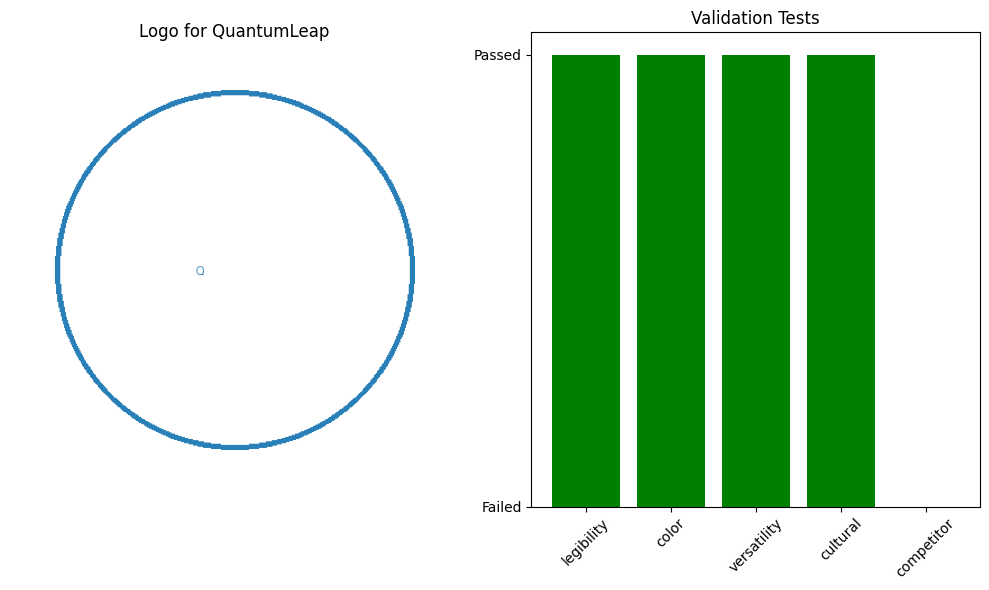


Validation Results:
- Legibility Test: PASSED
- Color Blindness Test: PASSED
- Versatility Test: PASSED
- Cultural Test: PASSED
- Competitor Similarity Test: FAILED

Failed Tests:
- Competitor Similarity Test
  Suggestion: Change design style, color scheme, or typeface to differentiate.

Memorability Test: FAILED
Memorability Score: 0.47/1.00

Exported logo files:
- PNG: quantumleap_logo.png
- SVG: quantumleap_logo.svg
- FAVICON: quantumleap_favicon.ico

Generating logo variations...
Generated 3 variations


In [4]:
# Example usage
# if __name__ == "__main__": # ==> No use of this statement when we are running our code in a single notebook
    # Sample brand info based on problem statement structure
brand_info = {
    'sector': 'tech',
    'company_name': 'QuantumLeap',
    'brand_values': ['innovation', 'trust', 'premium'],
    'target_audience': 'Tech-savvy professionals',
    'competitors': [
        {'name': 'TechForward', 'logo_style': 'wordmark'},
        {'name': 'NexGen', 'logo_style': 'abstract'}
    ],
    'style': 'minimalist',
    'color_palette': {
        'primary_colors': [(41, 128, 185), (52, 152, 219)],  # Blue shades
        'psychology': 'Trust, Intelligence, Innovation'
    },
    'typography': 'sans-serif',
    'logo_type': 'combination',
    'mandatory_elements': ['tech', 'modern']
}

# Run the generator
result = run_logo_generator(brand_info)

#Logo generator Interface App

In [5]:
!pip install pyngrok

In [6]:
# from pyngrok import ngrok
# # Configure ngrok with your authtoken
# ngrok.set_auth_token("2vll5jsoa8pfQPK9OBDsfewJM58_4jNerjgSvxWXGEGYDkXjj")

In [7]:
!ngrok config add-authtoken 2vll5jsoa8pfQPK9OBDsfewJM58_4jNerjgSvxWXGEGYDkXjj

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [8]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00


In [20]:
import threading
import time
import os
from pyngrok import ngrok

def run():
    os.system("streamlit run logo_generator_app.py")  # Replace with your main file if different

thread = threading.Thread(target=run)
thread.start()

time.sleep(5)
public_url = ngrok.connect(8502)
print("✅ Click this link to open the app:")
print(public_url)

✅ Click this link to open the app:
NgrokTunnel: "https://d48d-35-199-46-215.ngrok-free.app" -> "http://localhost:8502"


In [ ]:
import streamlit as st
# import pandas as pd
# import numpy as np
# from PIL import Image
# import io
# import base64
# from logo_generator import LogoGenerator, run_logo_generator


def main():
    st.title("AI Logo Generator")
    st.subheader("Generate custom logos based on brand requirements")

    # Form for collecting brand information
    with st.form("brand_info_form"):
        st.header("1. Industry & Brand Background")

        # Sector selection
        sector = st.selectbox(
            "Sector",
            ["Tech", "FMCG", "Sports", "Automobile", "Healthcare", "Finance", "Entertainment", "Other"]
        )

        # Company name
        company_name = st.text_input("Company Name", "BrandX")

        # Brand values
        brand_values_options = ["Innovation", "Trust", "Speed", "Sustainability",
                               "Premium Quality", "Efficiency", "Reliability", "Creativity",
                               "Simplicity", "Luxury", "Performance", "Affordability"]
        brand_values = st.multiselect("Brand Values (max 3)",
                                     brand_values_options,
                                     default=["Innovation", "Trust"])

        # Target audience
        target_audience = st.text_input("Target Audience",
                                       "E.g., Young athletes, Health-conscious millennials, etc.")

        st.subheader("Competitor Analysis")
        competitor1_name = st.text_input("Competitor 1 Name", "")
        competitor1_style = st.selectbox("Competitor 1 Logo Style",
                                        ["Wordmark", "Lettermark", "Emblem", "Abstract", "Combination"],
                                        key="comp1")

        competitor2_name = st.text_input("Competitor 2 Name", "")
        competitor2_style = st.selectbox("Competitor 2 Logo Style",
                                        ["Wordmark", "Lettermark", "Emblem", "Abstract", "Combination"],
                                        key="comp2")

        st.header("2. Design Requirements")

        # Style & Aesthetic
        style = st.selectbox(
            "Style & Aesthetic",
            ["Minimalist", "Bold & Energetic", "Eco-friendly", "Luxurious", "Retro", "Futuristic", "Playful"]
        )

        st.subheader("Color Palette")
        color_method = st.radio("Color Selection Method", ["AI Recommended", "Custom Colors"])

        custom_colors = []
        if color_method == "Custom Colors":
            col1, col2, col3 = st.columns(3)
            with col1:
                color1 = st.color_picker("Primary Color 1", "#1E88E5")
                custom_colors.append(color1)
            with col2:
                color2 = st.color_picker("Primary Color 2", "#43A047")
                custom_colors.append(color2)
            with col3:
                color3 = st.color_picker("Primary Color 3", "#E53935")
                custom_colors.append(color3)

        # Typography
        typography = st.selectbox(
            "Typography",
            ["Sans-serif", "Serif", "Slab-serif", "Handwritten", "Modern", "Decorative"]
        )

        # Logo Type
        logo_type = st.selectbox(
            "Logo Type",
            ["Wordmark", "Lettermark", "Emblem", "Abstract", "Combination"]
        )

        # Mandatory elements
        mandatory_elements = st.text_input("Mandatory Elements",
                                          "E.g., Leaf for organic brands, wings for aviation, etc.")

        # Submit button
        submitted = st.form_submit_button("Generate Logo")

    # Process the form submission
    if submitted:
        # Prepare the brand info dictionary
        competitors = []
        if competitor1_name:
            competitors.append({
                'name': competitor1_name,
                'logo_style': competitor1_style.lower()
            })
        if competitor2_name:
            competitors.append({
                'name': competitor2_name,
                'logo_style': competitor2_style.lower()
            })

        # Process color information
        if color_method == "Custom Colors":
            # Convert hex to RGB
            primary_colors = []
            for color_hex in custom_colors:
                # Convert hex to RGB
                r = int(color_hex[1:3], 16)
                g = int(color_hex[3:5], 16)
                b = int(color_hex[5:7], 16)
                primary_colors.append((r, g, b))
        else:
            primary_colors = []  # AI will recommend

        brand_info = {
            'sector': sector.lower(),
            'company_name': company_name,
            'brand_values': [value.lower() for value in brand_values],
            'target_audience': target_audience,
            'competitors': competitors,
            'style': style.lower(),
            'color_palette': {
                'primary_colors': primary_colors
            },
            'typography': typography.lower(),
            'logo_type': logo_type.lower(),
            'mandatory_elements': [elem.strip() for elem in mandatory_elements.split(',') if elem.strip()]
        }

        # Show loading state
        with st.spinner("Generating logo... This may take a moment"):
            try:
                # Initialize generator
                generator = LogoGenerator()

                # Generate primary logo
                logo_result = generator.generate_logo(brand_info)

                # Display logo
                st.success("Logo generated successfully!")

                # Show the logo
                st.image(logo_result['logo'], caption=f"Logo for {company_name}", use_column_width=True)

                # Show validation results
                st.subheader("Validation Results")
                validation = logo_result['validation']

                # Create a DataFrame for validation results
                validation_df = pd.DataFrame({
                    'Test': [test.replace('_', ' ').title() for test in validation.keys()],
                    'Result': ["PASSED" if result else "FAILED" for result in validation.values()]
                })

                # Style the dataframe
                def highlight_result(s):
                    return ['background-color: #CCFFCC' if v == "PASSED" else 'background-color: #FFCCCC' for v in s]

                st.dataframe(validation_df.style.apply(highlight_result, subset=['Result']))

                # Run memorability test
                memorability = generator.memorability_test(logo_result['logo'])
                st.subheader("Memorability Test")
                st.metric("Memorability Score", f"{memorability['score']:.2f}/1.00",
                          delta="PASSED" if memorability['passes'] else "FAILED")

                # Generate variations
                st.subheader("Logo Variations")
                variations = generator.generate_logo_variations(brand_info, num_variations=3)

                cols = st.columns(len(variations))
                for i, (col, var) in enumerate(zip(cols, variations)):
                    with col:
                        st.image(var['logo'], caption=f"Variation {i+1}")
                        if st.button(f"Choose Variation {i+1}", key=f"var_{i}"):
                            st.session_state['selected_logo'] = var
                            st.success(f"Selected Variation {i+1}")

                # Export options
                st.subheader("Export Options")
                export_formats = st.multiselect(
                    "Select export formats",
                    ["PNG", "SVG", "Favicon"],
                    default=["PNG"]
                )

                if st.button("Export Selected Logo"):
                    selected_logo = st.session_state.get('selected_logo', logo_result)
                    exports = generator.export_logo(
                        selected_logo,
                        formats=[fmt.lower() for fmt in export_formats]
                    )

                    st.success("Logo exported successfully!")
                    for fmt, path in exports.items():
                        st.download_button(
                            label=f"Download {fmt.upper()}",
                            data=open(path, "rb").read(),
                            file_name=path,
                            mime=f"image/{fmt}" if fmt != "favicon" else "image/x-icon"
                        )

            except Exception as e:
                st.error(f"Error generating logo: {str(e)}")
                st.exception(e)

# if __name__ == "__main__":
from pyngrok import ngrok

import threading
import time
import os

def run():
    os.system("streamlit run logo_generator_app.py")  # Replace with your main file if different
    # or
    # os.system("streamlit run <your_script_name>.py")

def start_ngrok():
    time.sleep(10)
    public_url = ngrok.connect(8502) # Connect to Streamlit's default port
    print("✅ Click this link to open the app:")
    print(public_url)

# Start Streamlit in a separate thread
thread = threading.Thread(target=run)
thread.start()

# Start ngrok in a separate thread
ngrok_thread = threading.Thread(target=start_ngrok)
ngrok_thread.start()

# Keep the main thread alive
while True:
    time.sleep(1)
# public_url = ngrok.connect(port=8501) # Connect to Streamlit's default port
# print(f"Public URL: {public_url}")
# main()

✅ Click this link to open the app:
NgrokTunnel: "https://ea90-35-199-46-215.ngrok-free.app" -> "http://localhost:8502"


In [ ]:
# # if __name__ == '__main__':
# main()
# st.rerun()  # Enable hot-reloading


In [ ]:
# # Start ngrok and get public URL
# tunnel = ngrok.connect(addr='8501', proto='http')  # Adjust port if needed
# public_url = tunnel.public_url
# print(f"Public URL: {public_url}")

In [ ]:
# !ngrok disconnect https://a875-34-56-52-125.ngrok-free.app

In [ ]:
# print(f"Public URL: {public_url}")

In [ ]:
# public_url = ngrok.connect(port='8501')
# print(f"Public URL: {public_url}")

In [19]:
!ngrok kill

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dash

In [18]:
!pkill ngrok